# ELG7186 - Fall 2022 - Assignment 3
## Due: <strong>Wednesday Nov. 23<sup>st</sup> 2022 -- 11:59pm</strong>

In this assignment, you will apply your knowledge of CNNs we want to estimate the growth stage of weeds using the number of leaves of the plant. The more leaves, the more the weed has grown.

The purpose of this assignment is to gain experience building and training neural networks. You will gain:
- More experience training CNNs
- Experience with problem reformulation
- Experience with techniques for improving results (Regularization, Data Augmentation)

You must use Keras with the Tensorflow backend, i.e., the package tensorflow.keras. For this assignment, you may use other tensorflow packages and scikit-learn, scikit-image or pandas but not other deep learning frameworks, e.g., pytorch, mxnet etc.

### Submission Details
Submit your Jupyter notebook .ipynb file using Brightspace. Do not include any other files or images as they will not be reviewed.
<p>
<strong>Make certain that you run all the cells in the notebook you submit</strong> or you will loose marks.
</p>
<ul>
<li>You can submit multiple times, but only the most recent submission will be saved</li>
<li>Do not wait until the last minute to submit in case you have an unexpected issue</li>
<li>Review the late policy in the syllabus</li>
<li><strong>You must submit your own work</strong> and abide by the University of Ottawa policy on plagiarism and fraud</li>
</ul>


### DO NOT submit any images from the dataset

## Part 0. Data Preparation

The data for this assignment are plant images at different resolutions captured with a variety of cameras. There are images showing plants with approximatelty 1,2,3,4 and 6 leafs. The images are part of a Leaf counting dataset by Teimouri et al. [1] which can be downloaded from the Aarhus University, Denmark:

<a href="https://vision.eng.au.dk/leaf-counting-dataset/">Leaf counting dataset</a> (Required files are posted on Brightspace)

However, you must work with the subset of images posted on BrightSpace as training.zip and testing.zip. There are 200 images for each of the 5 classes. As Figure 1 shows, there is a great variety of plants and image conditions. The dataset is split into a training and a testing set where there are 180 images per class for training and validation; and 20 images for testing.




In this section:
<ul>
<li>Download the dataset as described above</li>
<li>Use the splits provided in the Brightspace files</li>
<li>Visualize five images from the dataset.</li>
</ul>


In [ ]:
# Prepare your dataset here

In [1]:
import os 
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras
import numpy as np
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from sklearn.metrics import classification_report , confusion_matrix ,mean_squared_error
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns


In [2]:
Train_path = 'C:\\Users\\Eman Abood\\Downloads\\training'
Test_path = 'C:\\Users\\Eman Abood\\Downloads\\testing'

In [3]:
train_generator=tf.keras.preprocessing.image_dataset_from_directory(Train_path,
                                                 validation_split=0.2,
                                                 image_size=(128,128),
                                                 subset="training",
                                                 color_mode='rgb',
                                                 label_mode='categorical',batch_size=128 ,seed =123 )

val_generator=tf.keras.preprocessing.image_dataset_from_directory(Train_path,
                                                 validation_split=0.2,
                                                 image_size=(128,128),
                                                 subset="validation",
                                                 color_mode='rgb',
                                                 label_mode='categorical',batch_size=128,seed =123)

test_generator=tf.keras.preprocessing.image_dataset_from_directory(Test_path,
                                                 image_size=(128,128),
                                                 color_mode='rgb',
                                                 label_mode='categorical',batch_size=128)

Found 900 files belonging to 5 classes.
Using 720 files for training.
Found 900 files belonging to 5 classes.
Using 180 files for validation.
Found 100 files belonging to 5 classes.


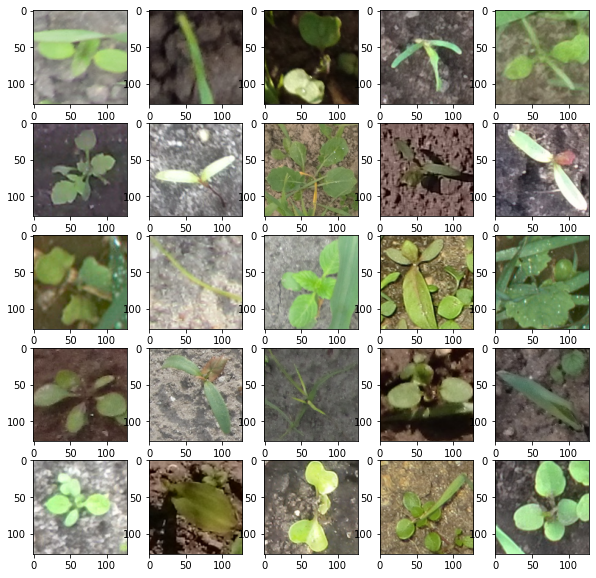

In [ ]:
plt.figure(figsize=(10, 10))
for img ,label in train_generator.take(5):
    for i in range(25):
        plt.subplot(5, 5,i+1)
        plt.imshow(img[i].numpy().astype("uint8"))
plt.show()


In [ ]:
img_Train=[]
for folder in os.listdir(Train_path):
    f_Train = os.path.join(Train_path, folder)
    print(f_Train)
    for imgtrain in os.listdir(f_Train):
        img_train=cv2.imread(os.path.join(f_Train,imgtrain))
        img_Train.append(img_train)    

C:\Users\Eman Abood\Downloads\training\1
C:\Users\Eman Abood\Downloads\training\2
C:\Users\Eman Abood\Downloads\training\3
C:\Users\Eman Abood\Downloads\training\4
C:\Users\Eman Abood\Downloads\training\6


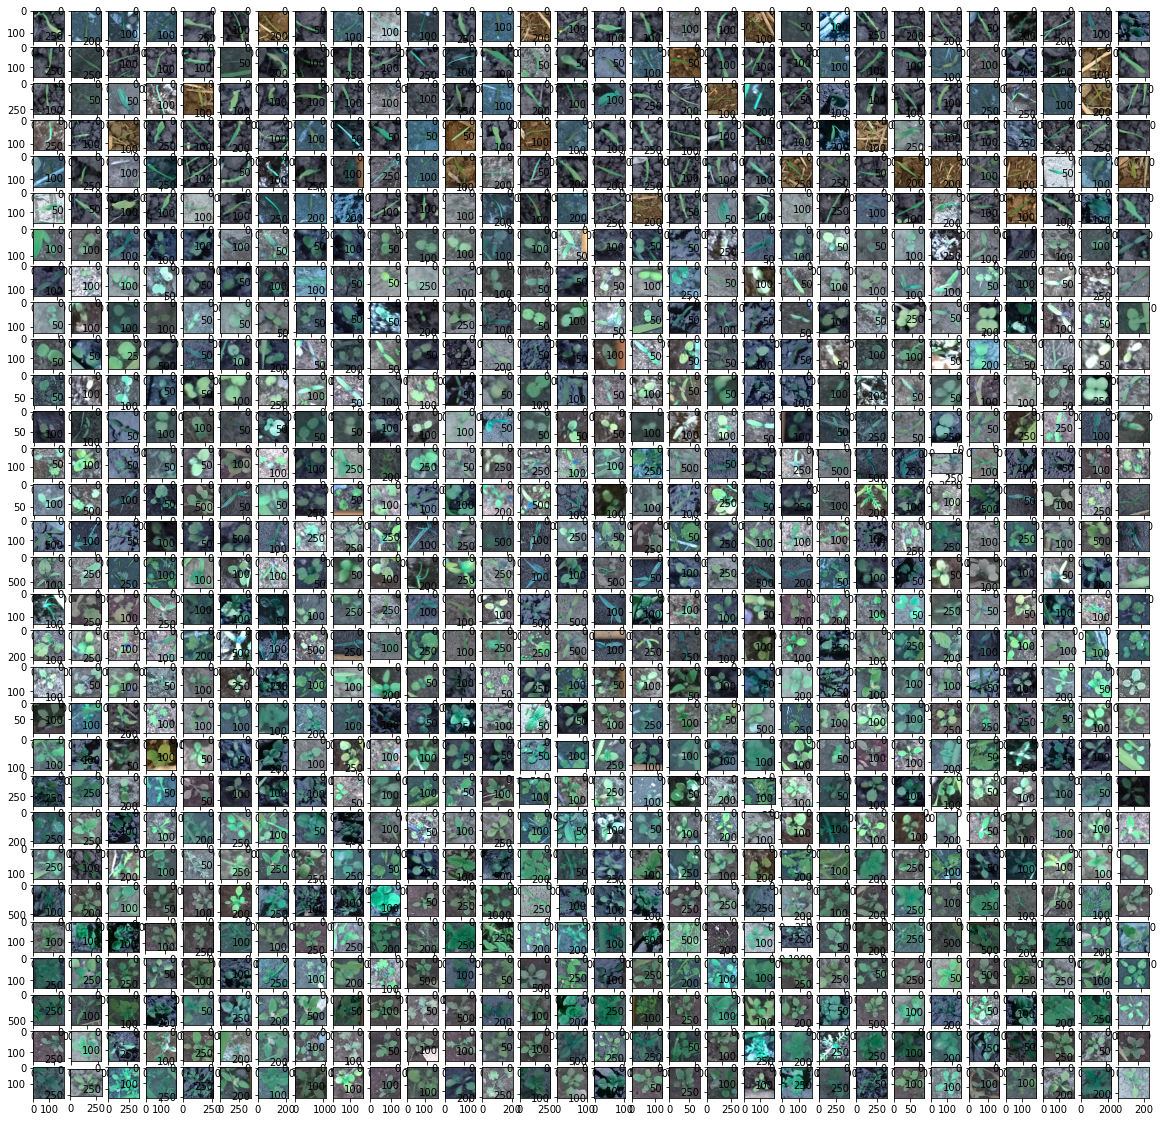

In [ ]:
plt.figure(figsize=(20,20))
for i in range(len(img_Train)):
    plt.subplot(30,30,i+1)
    plt.imshow(img_Train[i])

In [ ]:
img_Test=[]
for folder in os.listdir(Test_path):
    f_Test = os.path.join(Test_path, folder)
    print(f_Test)
    for imgtest in os.listdir(f_Test):
        img_test=cv2.imread(os.path.join(f_Test,imgtest))
        img_Test.append(img_test)  

C:\Users\Eman Abood\Downloads\testing\1
C:\Users\Eman Abood\Downloads\testing\2
C:\Users\Eman Abood\Downloads\testing\3
C:\Users\Eman Abood\Downloads\testing\4
C:\Users\Eman Abood\Downloads\testing\6


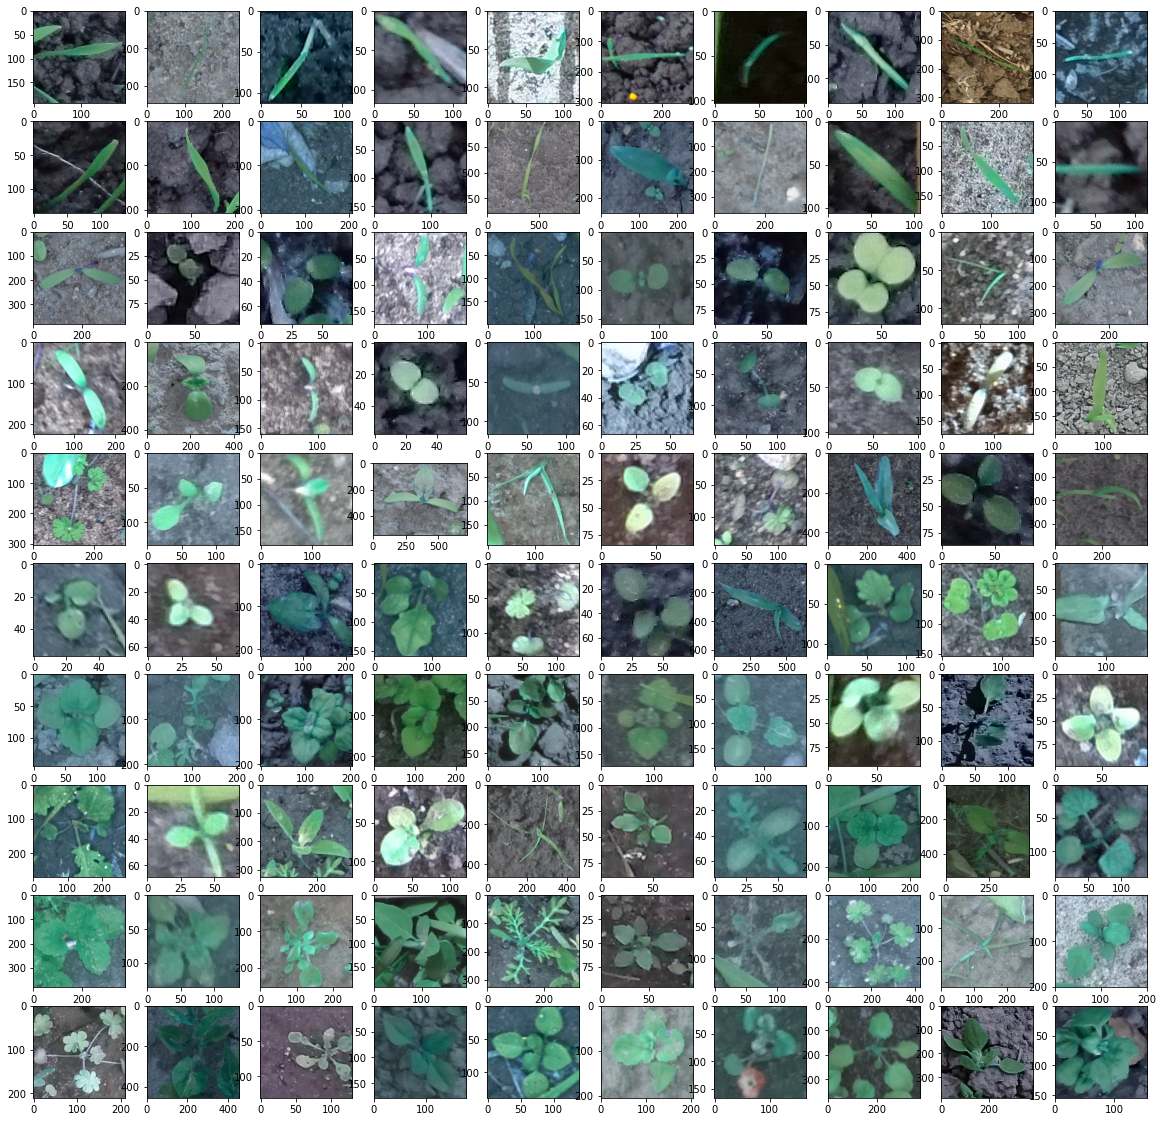

In [ ]:
plt.figure(figsize=(20,20))
for i in range(len(img_Test)):
    plt.subplot(10,10,i+1)
    plt.imshow(img_Test[i])

## Part 1a. Transfer Learning - Classification Network (3 Marks)
For this assignment, you are asked to use the Keras implementation of VGG-16 as a starting point. 

Using the first 2 blocks of VGG-16 add extra Keras layers to create your own version of a CNN network for the classification of the images according to the number of leaves in the plant images. Note that there will be 5 classes. The last layer from VGG-16 will be block2 pool and you are allowed to add no more than five fully connected or convolutional layers to the network including the final output layer. 

- You can use as many pooling, flattening, 1 × 1 convolution layers, etc. as you wish but do not use any regularization.
- Train this simple network on the training set while monitoring convergence on the validation set.
- As input to the model use images of size no larger than 128×128.

Note, it is highly recommended to use even smaller input images to try things out. You are not expected to fine-tune the initial VGG layers.

When your classifier is working:
- Plot a loss curve for training and validation data
- Plot an accuracy curve for training and validation data
- Provide confusion matrix of your network on the training including validation and testing data sets.


In [ ]:
# Write your code here

In [4]:
x_train = np.concatenate([x for x,y in train_generator], axis =0)
y_train= np.concatenate([y for x,y in train_generator], axis =0)
x_val = np.concatenate([x for x,y in val_generator], axis =0)
y_val= np.concatenate([y for x,y in val_generator], axis =0)
x_test = np.concatenate([x for x,y in test_generator], axis =0)
y_test= np.concatenate([y for x,y in test_generator], axis =0)

In [5]:
y_test.shape

(100, 5)

In [6]:
x_train/=255
x_val/=255
x_test/=255


In [ ]:
x_train.shape

(720, 128, 128, 3)

In [ ]:
model_vgg16 = VGG16(weights='imagenet',input_shape=(128,128, 3),include_top=False)

In [ ]:
for layer in model_vgg16.layers:
    layer.trainable = False

In [ ]:
model_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
x= model_vgg16.layers[6].output
x= Conv2D(1024, kernel_size=5, activation='relu')(x)
x= MaxPooling2D(pool_size=(2, 2))(x)
x= Conv2D(512, kernel_size=3, activation='relu')(x)
x= MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
output_layer = Dense(5, activation='softmax')(x)

In [ ]:
Finalmodel_vgg16=Model(inputs=model_vgg16.input, outputs=output_layer)

In [ ]:
Finalmodel_vgg16.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [ ]:
Finalmodel_vgg16.compile(optimizer=tensorflow.keras.optimizers.Adam(lr=.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
len(x_val)

180

In [ ]:
model = Finalmodel_vgg16.fit(x_train,y_train, batch_size=64, epochs=50, verbose=1,validation_data=(x_val,y_val))

Epoch 1/50
12/12 [==============================] - 37s 3s/step - loss: 65.1902 - accuracy: 0.2000 - val_loss: 1.7846 - val_accuracy: 0.1833
Epoch 2/50
12/12 [==============================] - 39s 3s/step - loss: 1.6683 - accuracy: 0.1833 - val_loss: 1.6464 - val_accuracy: 0.2111
Epoch 3/50
12/12 [==============================] - 42s 3s/step - loss: 1.6143 - accuracy: 0.1931 - val_loss: 1.6079 - val_accuracy: 0.2222
Epoch 4/50
12/12 [==============================] - 50s 4s/step - loss: 1.6128 - accuracy: 0.1931 - val_loss: 1.6186 - val_accuracy: 0.1444
Epoch 5/50
12/12 [==============================] - 54s 5s/step - loss: 1.6128 - accuracy: 0.2014 - val_loss: 1.6166 - val_accuracy: 0.1611
Epoch 6/50
12/12 [==============================] - 55s 5s/step - loss: 1.6118 - accuracy: 0.2194 - val_loss: 1.6267 - val_accuracy: 0.1722
Epoch 7/50
12/12 [==============================] - 54s 5s/step - loss: 1.6051 - accuracy: 0.2181 - val_loss: 1.6334 - val_accuracy: 0.2167
Epoch 8/50
12/12 [=

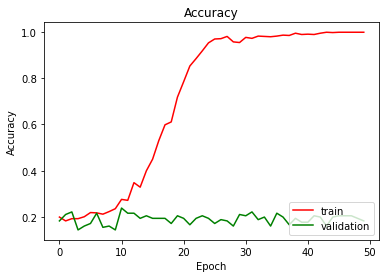

In [ ]:
plt.plot(model.history['accuracy'],c='red')
plt.plot(model.history['val_accuracy'],c='green')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='lower right')

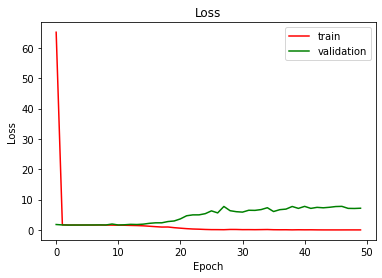

In [ ]:
plt.plot(model.history['loss'],c='red')
plt.plot(model.history['val_loss'],c='green') 
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='upper right')

In [ ]:
y_train_prob = Finalmodel_vgg16.predict(x_train)
ypredict_train = y_train_prob.argmax(axis=-1)

23/23 [==============================] - 17s 739ms/step


In [ ]:
print(classification_report(y_train.argmax(axis=-1),ypredict_train))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       141
           1       1.00      1.00      1.00       144
           2       1.00      1.00      1.00       134
           3       1.00      1.00      1.00       154
           4       1.00      0.99      1.00       147

    accuracy                           1.00       720
   macro avg       1.00      1.00      1.00       720
weighted avg       1.00      1.00      1.00       720



<AxesSubplot:>

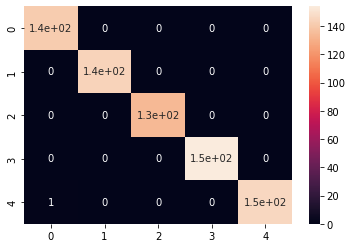

In [ ]:
sns.heatmap(confusion_matrix(y_train.argmax(axis=-1), ypredict_train) ,annot=True)

In [ ]:
y_val_prob = Finalmodel_vgg16.predict(x_val)
ypredict_val= y_val_prob.argmax(axis=-1)

6/6 [==============================] - 4s 674ms/step


In [ ]:
print(classification_report(y_val.argmax(axis=-1),ypredict_val))

              precision    recall  f1-score   support

           0       0.14      0.15      0.15        39
           1       0.16      0.17      0.16        36
           2       0.34      0.26      0.30        46
           3       0.16      0.19      0.18        26
           4       0.12      0.12      0.12        33

    accuracy                           0.18       180
   macro avg       0.18      0.18      0.18       180
weighted avg       0.20      0.18      0.19       180



<AxesSubplot:>

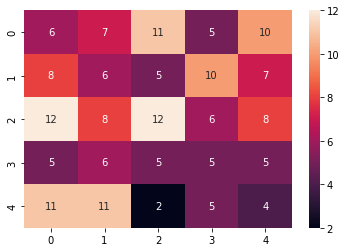

In [ ]:
sns.heatmap(confusion_matrix(y_val.argmax(axis=-1), ypredict_val) ,annot=True)

In [ ]:
y_test_prob = Finalmodel_vgg16.predict(x_test)
ypredict_test = y_test_prob.argmax(axis=-1)


4/4 [==============================] - 2s 528ms/step


In [ ]:
ypredict_test

array([3, 1, 1, 2, 1, 0, 1, 4, 3, 3, 1, 0, 4, 0, 0, 3, 3, 1, 3, 0, 0, 3,
       1, 1, 3, 4, 1, 1, 2, 4, 4, 0, 3, 0, 3, 3, 4, 4, 0, 0, 4, 2, 2, 3,
       2, 0, 0, 1, 2, 1, 1, 3, 4, 1, 1, 3, 3, 2, 3, 1, 1, 4, 2, 1, 4, 4,
       1, 0, 1, 3, 1, 1, 1, 3, 1, 2, 2, 1, 4, 4, 2, 3, 2, 2, 2, 1, 1, 2,
       2, 1, 0, 2, 1, 3, 1, 3, 2, 1, 0, 0], dtype=int64)

In [ ]:
y_test

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0.

In [ ]:
print(classification_report(y_test.argmax(axis=-1),ypredict_test))

              precision    recall  f1-score   support

           0       0.19      0.15      0.17        20
           1       0.19      0.30      0.24        20
           2       0.33      0.30      0.32        20
           3       0.24      0.25      0.24        20
           4       0.43      0.30      0.35        20

    accuracy                           0.26       100
   macro avg       0.28      0.26      0.26       100
weighted avg       0.28      0.26      0.26       100



<AxesSubplot:>

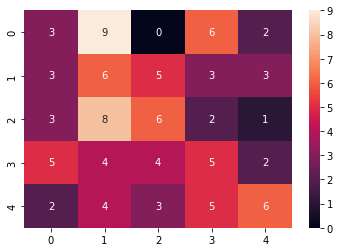

In [ ]:
sns.heatmap(confusion_matrix(y_test.argmax(axis=-1), ypredict_test) ,annot=True)

## Part 1b. Transfer Learning - Regression Reformulation (3 Marks)

### Step 1 (2)
Repeat the steps of Part 1a. but reformulate as a regression problem, i.e., your network needs to output a single float value ranging between 0 to 6 corresponding to the number of leaves. Again, you are not expected to fine-tune the initial VGG layers.

- Plot a loss curve for training and validation data
- Plot an accuracy curve for training and validation data
- Provide confusion matrix of your network on the training including validation and testing data sets.

### Step 2 (1)
The size of the training data is quite small. Discuss based on your learning curves if overfitting is occurring with the models from Parts 1a and 1b.

In [ ]:
#Write your code here

In [ ]:
ytrain_labeled = {0:1, 1:2, 2:3,3:4, 4:6}
y_train= np.concatenate([y for x,y in train_generator], axis =0).argmax(axis=-1)
y_val= np.concatenate([y for x,y in val_generator], axis =0).argmax(axis=-1)
y_test = y_test.argmax(axis=-1)

In [ ]:
y_test

array([3, 3, 3, 4, 2, 1, 2, 3, 4, 1, 2, 1, 3, 4, 2, 3, 1, 2, 0, 1, 2, 3,
       2, 0, 2, 0, 1, 1, 1, 0, 4, 1, 4, 3, 0, 4, 4, 4, 0, 3, 2, 4, 0, 3,
       4, 1, 4, 3, 1, 3, 3, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 4, 0, 2, 3,
       0, 4, 3, 0, 2, 1, 1, 0, 1, 4, 2, 3, 2, 0, 0, 2, 0, 2, 4, 1, 1, 4,
       1, 4, 4, 0, 0, 4, 3, 2, 1, 2, 3, 4], dtype=int64)

In [ ]:
ytrain = np.array([ytrain_labeled[key] for key in y_train]).astype(float)
yvalidate = np.array([ytrain_labeled[key] for key in y_val]).astype(float)
ytest = np.array([ytrain_labeled[key] for key in y_test]).astype(float)

In [ ]:
ytrain

array([2., 2., 4., 1., 3., 1., 2., 1., 4., 6., 4., 2., 1., 3., 3., 6., 1.,
       2., 6., 4., 3., 2., 6., 4., 4., 1., 1., 4., 6., 4., 6., 1., 3., 1.,
       6., 4., 1., 1., 6., 3., 4., 1., 4., 1., 4., 6., 1., 4., 3., 1., 4.,
       1., 4., 6., 2., 1., 3., 3., 4., 4., 6., 6., 6., 3., 6., 3., 6., 4.,
       6., 2., 1., 4., 4., 6., 4., 1., 2., 6., 2., 3., 6., 1., 1., 6., 1.,
       6., 3., 1., 1., 2., 6., 6., 6., 1., 1., 1., 2., 2., 6., 3., 4., 3.,
       2., 3., 3., 6., 1., 4., 4., 3., 3., 4., 4., 2., 2., 6., 4., 6., 1.,
       2., 4., 4., 6., 1., 3., 6., 6., 2., 6., 2., 1., 6., 1., 4., 3., 4.,
       6., 2., 6., 6., 3., 3., 4., 1., 4., 2., 2., 1., 3., 1., 6., 3., 4.,
       2., 3., 3., 2., 1., 4., 4., 3., 4., 1., 4., 3., 3., 6., 6., 1., 2.,
       6., 2., 6., 1., 3., 1., 2., 6., 4., 6., 2., 3., 3., 4., 4., 3., 6.,
       4., 2., 4., 2., 3., 6., 2., 2., 2., 2., 1., 3., 2., 2., 4., 6., 4.,
       6., 1., 3., 4., 4., 2., 1., 6., 1., 6., 6., 2., 3., 2., 1., 4., 2.,
       1., 4., 3., 2., 1.

In [ ]:
model1_vgg16 = VGG16(weights='imagenet',input_shape=(128,128, 3),include_top=False,classifier_activation="linear")

In [ ]:
model1_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
for layer in model1_vgg16.layers:
    layer.trainable = False

In [ ]:
model1_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
x=model1_vgg16.layers[6].output
x= Conv2D(1024, kernel_size=5, activation='tanh')(x)
x= MaxPooling2D(pool_size=(2, 2))(x)
x= Conv2D(512, kernel_size=3, activation='relu')(x)
x= MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
output_layer = Dense(1, activation='linear')(x)

In [ ]:
Finalmodel1_vgg16=Model(inputs=model1_vgg16.input, outputs=output_layer)

In [ ]:
Finalmodel1_vgg16.summary()

Model: "model_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0  

In [ ]:
Finalmodel1_vgg16.compile(optimizer=tensorflow.keras.optimizers.Adam(lr=1e-5), loss='mean_squared_error', metrics=['mean_squared_error'])

In [ ]:
model1 = Finalmodel1_vgg16.fit(x_train,ytrain, batch_size=64, epochs=50, verbose=1,validation_data=(x_val,yvalidate))

Epoch 1/50
12/12 [==============================] - 39s 3s/step - loss: 5.4733 - mean_squared_error: 5.4733 - val_loss: 2.9863 - val_mean_squared_error: 2.9863
Epoch 2/50
12/12 [==============================] - 40s 3s/step - loss: 2.9010 - mean_squared_error: 2.9010 - val_loss: 2.9211 - val_mean_squared_error: 2.9211
Epoch 3/50
12/12 [==============================] - 41s 3s/step - loss: 2.5981 - mean_squared_error: 2.5981 - val_loss: 3.0113 - val_mean_squared_error: 3.0113
Epoch 4/50
12/12 [==============================] - 41s 3s/step - loss: 2.3061 - mean_squared_error: 2.3061 - val_loss: 2.9660 - val_mean_squared_error: 2.9660
Epoch 5/50
12/12 [==============================] - 44s 4s/step - loss: 2.1269 - mean_squared_error: 2.1269 - val_loss: 3.0232 - val_mean_squared_error: 3.0232
Epoch 6/50
12/12 [==============================] - 41s 3s/step - loss: 1.8559 - mean_squared_error: 1.8559 - val_loss: 2.9868 - val_mean_squared_error: 2.9868
Epoch 7/50
12/12 [======================

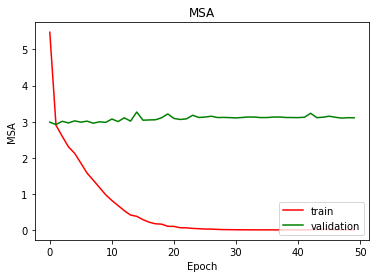

In [ ]:
plt.plot(model1.history['mean_squared_error'],c='red')
plt.plot(model1.history['val_mean_squared_error'],c='green')
plt.title('MSA')
plt.ylabel('MSA')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='lower right')

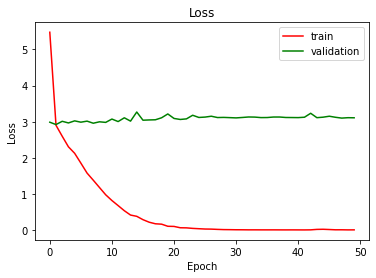

In [ ]:
plt.plot(model1.history['loss'],c='red')
plt.plot(model1.history['val_loss'],c='green')
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='upper right')

In [ ]:
x_train

array([[[[0.4627451 , 0.42352942, 0.41960785],
         [0.4598805 , 0.426394  , 0.41960785],
         [0.4501838 , 0.41881126, 0.41096812],
         ...,
         [0.36766237, 0.33196998, 0.32628676],
         [0.3547488 , 0.32337624, 0.3155331 ],
         [0.34901962, 0.31764707, 0.30980393]],

        [[0.45128676, 0.41207108, 0.4081495 ],
         [0.44632968, 0.4086582 , 0.40396452],
         [0.4358609 , 0.3987592 , 0.39378065],
         ...,
         [0.37181377, 0.33354774, 0.32915136],
         [0.35893375, 0.32183203, 0.3168535 ],
         [0.34901962, 0.3119179 , 0.30693933]],

        [[0.4276195 , 0.38408396, 0.3823223 ],
         [0.4155793 , 0.37519926, 0.37185985],
         [0.40368658, 0.3644709 , 0.36054933],
         ...,
         [0.36902574, 0.32981005, 0.32588848],
         [0.35441157, 0.3151959 , 0.31127432],
         [0.33821997, 0.2990043 , 0.29508272]],

        ...,

        [[0.3580576 , 0.3423713 , 0.33844975],
         [0.3478861 , 0.3321998 , 0.32827824]

In [ ]:
ypredict_train = Finalmodel1_vgg16.predict(x_train)


23/23 [==============================] - 17s 752ms/step


In [ ]:
ypredict_train

array([[1.9816992 ],
       [1.9881407 ],
       [3.9707873 ],
       [0.9822623 ],
       [2.9903297 ],
       [0.95174694],
       [1.9287176 ],
       [0.9595762 ],
       [3.981943  ],
       [5.990051  ],
       [3.945436  ],
       [1.9521344 ],
       [0.96195626],
       [2.9477048 ],
       [2.9746957 ],
       [5.988077  ],
       [0.9571504 ],
       [1.9278554 ],
       [5.9440613 ],
       [3.9826398 ],
       [2.9652157 ],
       [2.0568602 ],
       [5.9794393 ],
       [3.9483647 ],
       [3.9891095 ],
       [0.9652514 ],
       [0.9340669 ],
       [3.9539886 ],
       [5.965767  ],
       [3.9761722 ],
       [5.9923477 ],
       [0.9901581 ],
       [2.9629068 ],
       [0.9371489 ],
       [5.9411683 ],
       [3.9690776 ],
       [0.9838152 ],
       [0.9470209 ],
       [5.9703255 ],
       [2.980718  ],
       [3.9725204 ],
       [0.96709466],
       [3.9671607 ],
       [0.9460356 ],
       [4.007789  ],
       [5.9545956 ],
       [0.9659178 ],
       [3.959

In [ ]:
mean_squared_error(ypredict_train, ytrain, squared=False)

0.0914059568291764

In [ ]:
ypredict_train = ypredict_train.astype(int)

In [ ]:
print(classification_report(ypredict_train, ytrain))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       122
           1       0.13      0.13      0.13       142
           2       0.15      0.15      0.15       140
           3       0.10      0.09      0.10       150
           4       0.12      0.90      0.21        20
           5       0.00      0.00      0.00       130
           6       0.11      1.00      0.20        16

    accuracy                           0.12       720
   macro avg       0.09      0.33      0.11       720
weighted avg       0.08      0.12      0.09       720



<AxesSubplot:>

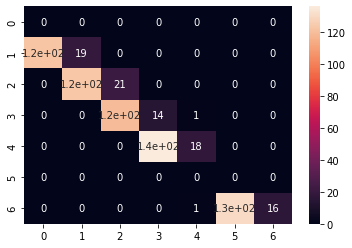

In [ ]:
sns.heatmap(confusion_matrix(ytrain, ypredict_train),annot=True)

In [ ]:
ypredict_val = Finalmodel1_vgg16.predict(x_val)
mean_squared_error(ypredict_val, yvalidate, squared=False)
ypredict_val = ypredict_val.astype(int)

6/6 [==============================] - 4s 710ms/step


In [ ]:
print(classification_report(ypredict_val, yvalidate))

              precision    recall  f1-score   support

         1.0       0.03      0.20      0.05         5
         2.0       0.31      0.21      0.25        53
         3.0       0.59      0.25      0.35       109
         4.0       0.12      0.25      0.16        12
         5.0       0.00      0.00      0.00         1
         6.0       0.00      0.00      0.00         0

    accuracy                           0.23       180
   macro avg       0.17      0.15      0.13       180
weighted avg       0.45      0.23      0.30       180



<AxesSubplot:>

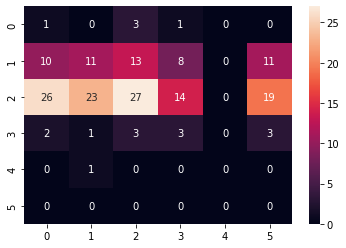

In [ ]:
sns.heatmap(confusion_matrix(ypredict_val, yvalidate),annot=True)

In [ ]:
ypredict_test = Finalmodel1_vgg16.predict(x_test)
mean_squared_error(ypredict_test, ytest, squared=False)
ypredict_test = ypredict_test.astype(int)

4/4 [==============================] - 2s 560ms/step


In [ ]:
print(classification_report(ypredict_test, ytest))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.00      0.00      0.00         0
         2.0       0.35      0.21      0.26        34
         3.0       0.60      0.20      0.30        59
         4.0       0.10      0.33      0.15         6
         6.0       0.00      0.00      0.00         0

    accuracy                           0.21       100
   macro avg       0.18      0.12      0.12       100
weighted avg       0.48      0.21      0.28       100



<AxesSubplot:>

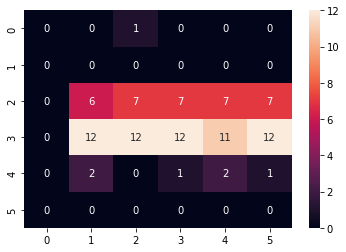

In [ ]:
sns.heatmap(confusion_matrix(ypredict_test, ytest),annot=True)

## **Discussion for Part1 a, b**
* From The Results for Model(a), I show how the model overfitting results in an
increase in validation loss instead of a decrease when all classes are trained in accordance with the model's specifications. It isn't tested correctly.
* From The Result for Model(b) I have shown from the loss figure that the loss validation increase not decrease like the training, the result of accuracy less because constructing the classification problem into regression makes the accuracy float and when making it integer it affects in results and when comparing between the y actual and y predict don't equally.

## Part 2. Improve your Model (4 Marks)

Regularization and data augmentation are common strategies to deal with small datasets.

### Step 1 (1.5)
Incorporate Batch Normalization and Dropout into your design the superior network trained in Part 1. You are not expected to fine-tune the initial VGG layers. Again you will provide the following:
- A loss curve for training and validation data
- An accuracy curve for training and validation data
- A confusion matrix of your network on the training including validation and testing data sets.
 

### Step 2 (1.5)
Train the same model from Step 1, now using data augmentation. Again, please provide the same output metrics as in Step 1.

### Step 3 (1)
Discuss based on your learning curves and final metrics in Step 2, how large a improvement can be observed from regularization and data augmentation.

In [ ]:
# Write your code here

In [ ]:
x_train = np.concatenate([x for x,y in train_generator], axis =0)
y_train= np.concatenate([y for x,y in train_generator], axis =0)
x_val = np.concatenate([x for x,y in val_generator], axis =0)
y_val= np.concatenate([y for x,y in val_generator], axis =0)
x_test = np.concatenate([x for x,y in test_generator], axis =0)
y_test= np.concatenate([y for x,y in test_generator], axis =0)

In [ ]:
x_train/=255
x_val/=255
x_test/=255


## step1

In [ ]:
 vgg_model_best = VGG16(weights='imagenet',include_top=False, input_shape=(128, 128, 3))

In [ ]:
for layer in vgg_model_best.layers:
    layer.trainable = False

In [ ]:
x1= vgg_model_best.layers[6].output
x1= Conv2D(1024, kernel_size=5, activation='relu')(x1)
x1= MaxPooling2D(pool_size=(2, 2))(x1)
x1= Conv2D(512, kernel_size=3, activation='relu')(x1)
x1= MaxPooling2D(pool_size=(2, 2))(x1)
x1 = Flatten()(x1)
x1=Dropout(0.5)(x1)
x1 = Dense(256, activation='relu')(x1)
x1 = BatchNormalization()(x1)
x1 = Dense(128, activation='relu')(x1)
x1=Dropout(0.5)(x1)
output_layer_best = Dense(5, activation='softmax')(x1)
vgg_model_best =Model(inputs=vgg_model_best.input,outputs=output_layer_best)

In [ ]:
vgg_model_best.compile(optimizer=tensorflow.keras.optimizers.Adam(lr=.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
Bestmodel = vgg_model_best.fit(x_train,y_train, batch_size=64, epochs=50, verbose=1,validation_data=(x_val,y_val))

Epoch 1/50
12/12 [==============================] - 38s 3s/step - loss: 2.0782 - accuracy: 0.1917 - val_loss: 8.0134 - val_accuracy: 0.2389
Epoch 2/50
12/12 [==============================] - 39s 3s/step - loss: 1.8448 - accuracy: 0.2167 - val_loss: 2.8039 - val_accuracy: 0.2556
Epoch 3/50
12/12 [==============================] - 40s 3s/step - loss: 1.7989 - accuracy: 0.2181 - val_loss: 2.2302 - val_accuracy: 0.2000
Epoch 4/50
12/12 [==============================] - 42s 4s/step - loss: 1.7835 - accuracy: 0.1917 - val_loss: 2.6636 - val_accuracy: 0.1833
Epoch 5/50
12/12 [==============================] - 40s 3s/step - loss: 1.7648 - accuracy: 0.2000 - val_loss: 1.7414 - val_accuracy: 0.2500
Epoch 6/50
12/12 [==============================] - 65s 6s/step - loss: 1.6749 - accuracy: 0.2306 - val_loss: 2.1883 - val_accuracy: 0.2556
Epoch 7/50
12/12 [==============================] - 47s 4s/step - loss: 1.6836 - accuracy: 0.2181 - val_loss: 1.6280 - val_accuracy: 0.2556
Epoch 8/50
12/12 [==

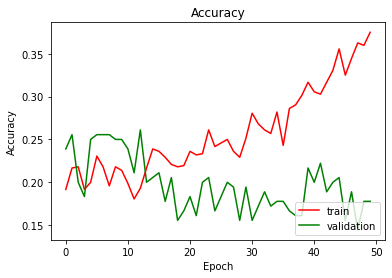

In [ ]:
plt.plot(Bestmodel.history['accuracy'],c='red')
plt.plot(Bestmodel.history['val_accuracy'],c='green')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='lower right')

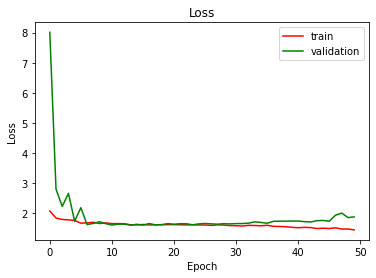

In [ ]:
plt.plot(Bestmodel.history['loss'],c='red')
plt.plot(Bestmodel.history['val_loss'],c='green')
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='upper right')

In [ ]:
y_predict_probL_train = vgg_model_best.predict(x_train)
y_predict_train = y_predict_probL_train.argmax(axis=-1)

23/23 [==============================] - 29s 1s/step


In [ ]:
print(classification_report(y_predict_train, y_train.argmax(-1)))

              precision    recall  f1-score   support

           0       0.01      1.00      0.01         1
           1       0.01      0.20      0.03        10
           2       0.00      0.00      0.00         0
           3       0.24      0.28      0.26       134
           4       0.91      0.23      0.37       575

    accuracy                           0.24       720
   macro avg       0.23      0.34      0.13       720
weighted avg       0.77      0.24      0.34       720



<AxesSubplot:>

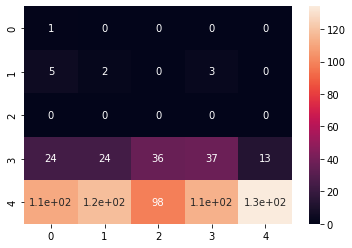

In [ ]:
sns.heatmap(confusion_matrix(y_predict_train, y_train.argmax(-1)),annot=True)

In [ ]:
y_predict_probL_val = vgg_model_best.predict(x_val)
y_predictL_val = y_predict_probL_val.argmax(axis=-1)

6/6 [==============================] - 7s 1s/step


In [ ]:
print(classification_report(y_predictL_val, y_val.argmax(axis=-1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         0
           3       0.19      0.12      0.14        43
           4       0.82      0.20      0.32       134

    accuracy                           0.18       180
   macro avg       0.20      0.06      0.09       180
weighted avg       0.66      0.18      0.28       180



<AxesSubplot:>

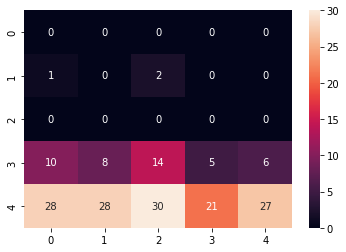

In [ ]:
sns.heatmap(confusion_matrix(y_predictL_val, y_val.argmax(-1)),annot=True)

In [ ]:
y_predict_probL = vgg_model_best.predict(x_test)
y_predictL = y_predict_probL.argmax(axis=-1)

4/4 [==============================] - 4s 876ms/step


In [ ]:
print(classification_report(y_test.argmax(axis=-1), y_predictL))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        20
           3       0.29      0.30      0.29        20
           4       0.22      0.85      0.34        20

    accuracy                           0.23       100
   macro avg       0.10      0.23      0.13       100
weighted avg       0.10      0.23      0.13       100



<AxesSubplot:>

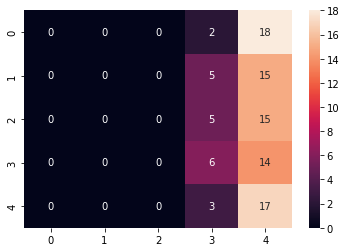

In [ ]:
sns.heatmap(confusion_matrix(y_test.argmax(axis=-1), y_predictL), annot= True)

## step2 "data augmentation"

In [7]:
datagen_train = ImageDataGenerator(
        rotation_range=10, 
        width_shift_range=0.2,
        height_shift_range=0.2, 
        zoom_range=0.2, 
        horizontal_flip=True, 
        brightness_range=[0.2,1.2])

In [8]:
train_generator = datagen_train.flow_from_directory(
                  directory=Train_path,
                  target_size=(128, 128),
                  color_mode="rgb", 
                  batch_size=64, 
                  class_mode="categorical",
                  seed=2020 
)

Found 900 images belonging to 5 classes.


In [9]:
Traindatagen = ImageDataGenerator(rescale=1/255.,validation_split=0.2)

In [10]:
len(train_generator)

900

In [11]:
x_train = np.concatenate([x_train,x_val])
y_train = np.concatenate([y_train,y_val])

In [12]:
y_train

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [13]:
training_generator = Traindatagen.flow(x_train, y_train, batch_size=64,subset='training',seed=7)
validation_generator = Traindatagen.flow(x_train, y_train, batch_size=64,subset='validation',seed=7)

In [14]:
x_train_gen , y_train_gen = next(training_generator)
x_val_gen , y_val_gen = next(training_generator)

In [ ]:
vgg_model_aug = VGG16(weights='imagenet',include_top=False, input_shape=(128, 128, 3))

In [ ]:
for layer in vgg_model_aug.layers:
    layer.trainable=False

In [ ]:
x= vgg_model_aug.layers[6].output
x= Conv2D(1024, kernel_size=5, activation='relu')(x)
x= MaxPooling2D(pool_size=(2, 2))(x)
x= Conv2D(512, kernel_size=3, activation='relu')(x)
x= MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x=Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu')(x)
x=Dropout(0.3)(x)
output_layer = Dense(5, activation='softmax')(x)

In [ ]:
vgg_model_aug =Model(inputs=vgg_model_aug.input,outputs=output_layer)

In [ ]:
vgg_model_aug.compile(optimizer=tensorflow.keras.optimizers.Adam(lr=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
vgg_model_augm = vgg_model_aug.fit_generator(train_generator, validation_data=validation_generator,epochs=50)

Epoch 1/50
13/13 [==============================] - 10s 857ms/step - loss: 1.6094 - accuracy: 0.3077 - val_loss: 93.3324 - val_accuracy: 0.2083
Epoch 2/50
13/13 [==============================] - 10s 848ms/step - loss: 1.6095 - accuracy: 0.1538 - val_loss: 135.4670 - val_accuracy: 0.1927
Epoch 3/50
13/13 [==============================] - 10s 857ms/step - loss: 1.6094 - accuracy: 0.1538 - val_loss: 155.8165 - val_accuracy: 0.1927
Epoch 4/50
13/13 [==============================] - 11s 928ms/step - loss: 1.6095 - accuracy: 0.2308 - val_loss: 200.2338 - val_accuracy: 0.2396
Epoch 5/50
13/13 [==============================] - 10s 849ms/step - loss: 1.6095 - accuracy: 0.0000e+00 - val_loss: 247.0192 - val_accuracy: 0.2188
Epoch 6/50
13/13 [==============================] - 10s 854ms/step - loss: 1.6095 - accuracy: 0.1538 - val_loss: 249.0240 - val_accuracy: 0.2188
Epoch 7/50
13/13 [==============================] - 10s 855ms/step - loss: 1.6094 - accuracy: 0.3846 - val_loss: 271.2695 - val

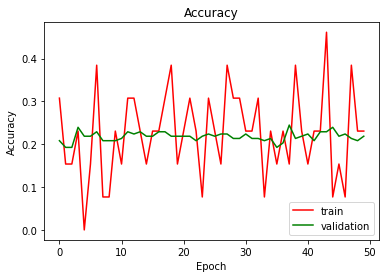

In [ ]:
plt.plot(vgg_model_augm.history['accuracy'],c='red')
plt.plot(vgg_model_augm.history['val_accuracy'],c='green')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='lower right')

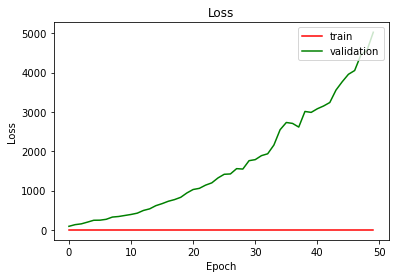

In [ ]:
plt.plot(vgg_model_augm.history['loss'],c='red')
plt.plot(vgg_model_augm.history['val_loss'],c='green')
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='upper right')

In [ ]:
y_predict_probL_train = vgg_model_aug.predict(x_train_gen)
y_predictL_train = y_predict_probL_train.argmax(axis=-1)

34/34 [==============================] - 47s 1s/step


In [ ]:
y_predict_probL_val = vgg_model_aug.predict(x_val_gen)
y_predictL_val = y_predict_probL_val.argmax(axis=-1)

6/6 [==============================] - 8s 1s/step


In [ ]:
y_predict_probL = vgg_model_aug.predict(test_generator)
y_predictL = y_predict_probL.argmax(axis=-1)

1/1 [==============================] - 5s 5s/step


              precision    recall  f1-score   support

           0       0.20      1.00      0.34       219
           1       0.00      0.00      0.00       216
           2       0.00      0.00      0.00       226
           3       0.00      0.00      0.00       206
           4       0.00      0.00      0.00       213

    accuracy                           0.20      1080
   macro avg       0.04      0.20      0.07      1080
weighted avg       0.04      0.20      0.07      1080



<AxesSubplot:>

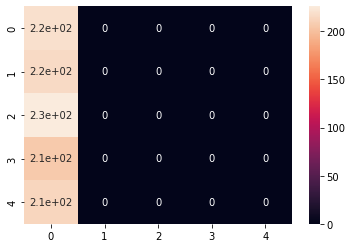

In [ ]:
print(classification_report(y_train_gen.argmax(axis=-1),y_predictL_train))
sns.heatmap(confusion_matrix(y_train_gen.argmax(axis=-1),y_predictL_train), annot= True)

              precision    recall  f1-score   support

           0       0.22      1.00      0.36        39
           1       0.00      0.00      0.00        36
           2       0.00      0.00      0.00        46
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00        33

    accuracy                           0.22       180
   macro avg       0.04      0.20      0.07       180
weighted avg       0.05      0.22      0.08       180



<AxesSubplot:>

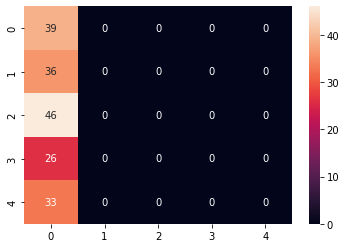

In [ ]:
print(classification_report(y_val_gen.argmax(axis=-1),y_predictL_val))
sns.heatmap( confusion_matrix(y_val_gen.argmax(axis=-1),y_predictL_val), annot= True)

              precision    recall  f1-score   support

           0       0.32      0.60      0.41        20
           1       0.00      0.00      0.00        20
           2       0.23      0.60      0.33        20
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00        20

    accuracy                           0.24       100
   macro avg       0.11      0.24      0.15       100
weighted avg       0.11      0.24      0.15       100



<AxesSubplot:>

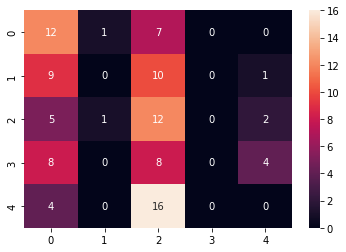

In [ ]:
print(classification_report(y_test.argmax(axis=-1),y_predictL))
sns.heatmap(confusion_matrix(y_test.argmax(axis=-1),y_predictL), annot= True)

## **Discussion step3  "Part2"**
* Based on results, I can demonstrate that using dropout and batch normatization, the loss figure for training and validation is reduced, and the overfitting issue is resolved. However, there is a second issue: the model cannot train all classes, and the classes that it trained also couldn't train correctly.
* from the result of augmentation The model can't predict class 0 from the results of augmentation, and training accuracy is worse than that of testing and validation because When you employ Dropout, this occurs because the behavior between training and testing differs. A portion of the features are set to zero during training (in this case, 50% since Dropout(0.5) was used). Testing involves utilizing all functionalities (and are scaled appropriately). Therefore, the model at test time is more reliable and can result in improved testing accuracy.

## References
[1] N. Teimouri, M. Dyrmann, P. R. Nielsen, S. K. Mathiassen, G. J. Somerville, and R. N. Jørgensen, “Weed growth stage estimator using deep convolutional neural networks,” Sensors, vol. 18, no. 5, 2018.